In [ ]:
                                         Task - I 
                                Prediction using Supervised ML 

                                                                     - Shraddha Khatavkar

In [ ]:
# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression 
functions. 
We will start with simple linear regression involving two variables.



In [ ]:
# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number 
of hours they studied. 
This is a simple linear regression task as it involves just two variables.

In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import Dataset

In [2]:
link_task1 = 'http://bit.ly/w-data'
data = pd.read_csv(link_task1)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Preprocess the data

In [4]:
data.shape

(25, 2)

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
# Visualization of Data

In [ ]:
Let's plot our data points on graph see if we can manually find any relationship between the data. 
We can create the plot with two variable - 'Hours' and 'Scores'

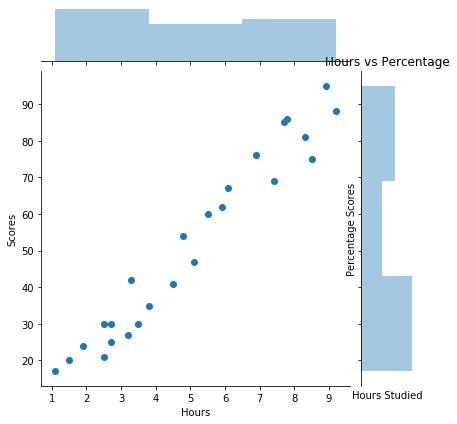

In [10]:
sns.jointplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

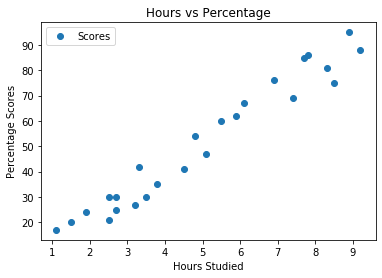

In [11]:
data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

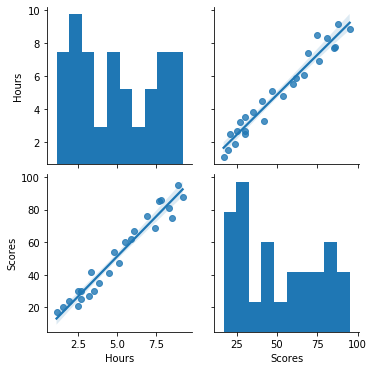

In [12]:
sns.pairplot(data, kind="reg")
plt.show()



In [ ]:
From the graph above, 

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score 
i.e. it is positive skewed.

In [ ]:
# Preparing the data
Now we divide the data into 'attributes' i.e. input and 'labels' i.e. output


In [13]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values

In [ ]:
# Now we split the data into train and test dataset. 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [15]:
# Training the Algorithm

In [16]:
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()
lineReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Complete Training')

Complete Training


In [18]:
# Plotting the Regression Line
line = lineReg.coef_*X + lineReg.intercept_

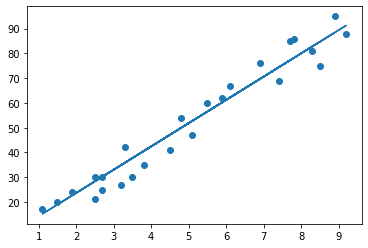

In [32]:
# plotting for the test data
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [22]:
# Making the predictions for the percentage of marks of an student based on the number of study hours.

In [23]:
print(X_test)
y_pred = lineReg.predict(X_test)

[[2.7]
 [3.3]
 [3.2]
 [3.8]
 [2.5]
 [7.7]
 [1.5]]


In [24]:
# Now we are Compairing the Actual Vs Predicting

In [25]:
df = pd.DataFrame({'Acual' : y_test , 'Predicted' : y_pred})
df

,Acual,Predicted
0,25,30.186552
1,42,35.824730
2,27,34.885033
3,35,40.523211
4,21,28.307160
5,85,77.171366
6,20,18.910197


In [26]:
# Here we test with our own data.

In [27]:
# Hours = []
Hours = 9.25
# Hours.reshape(-1,1)
my_pred = lineReg.predict([[9.25]])
print('Predicted Score if a student studies for 9.25 hrs  per day is {}'.format(my_pred))

Predicted Score if a student studies for 9.25 hrs  per day is [91.73665797]


In [28]:
# Evaluating the model

This is the final step to evaluate the performance of algorithm. This step is particularly important to compare how well 
different algorithms perform on a particular dataset. 
For simplicity here, we have chosen the mean square error. There are many such metrics.

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error (y_test , y_pred))

Mean Absolute Error: 5.8565234239682455
